# Part 4
#### Visualise training data on a 2-dimensional plot taking one feature (attribute) on one axis and other feature on another axis.

In [1]:
import pandas as pd
import numpy as num
import random
import math
import pprint

In [2]:
def train_test_set(data,precentage):
    indices=data.index.tolist()
    test_size=(int)(precentage*len(data))
    test_set_indices=random.sample(population=indices,k=test_size)
    test_set=data.loc[test_set_indices]
    train_set=data.drop(test_set_indices)
    return train_set,test_set
list_categorial_attribute=['Work_accident','promotion_last_5years','sales','salary']
list_numeric_attribute=['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company'
]
dic_avg_numeric={}

#### Reading and Dividing data in Training and Vaildation data 

In [3]:
data=pd.read_csv("train.csv")
train_data=data.sample(frac=0.8,random_state=200)
test_data=data.drop(train_data.index)


#### is_pure fuction 
Tests wheather only one type data is left or not

In [4]:
def is_pure(data):
    current=data['left']
    if len(set(current))==1:
        return True 
    else: 
        return False


#### calc _entropy function 
Calculates the entropy of given Data  

In [5]:
def calc_entropy(data):
    current=data['left'].tolist()
    if is_pure(data):
        return 0
    else:
        num_one=current.count(1)
        p=num_one/float(len(data.index))
        entropy= ((p*math.log(p,2)) + ((1-p)*math.log(1-p,2)))*-1
        return entropy


#### calc_information function
calculates the information in given data with respect each and every atttributes provided

In [6]:
def calc_information(data,attribute):
    current=set(data[attribute])
    information=0
    for cur in current:
        current_data=data[data[attribute]==cur]
        current_entropy=calc_entropy(current_data)*(len(current_data.index)/float(len(data.index)))
        information=information+current_entropy
    return information

#### calc_information_gain function
 Calculates Information Gain of attribute on the given data

In [7]:
def calc_inforamtion_gain(data,attribute):
    return calc_entropy(data)-calc_information(data,attribute)

#### best_information_gain function 
Find best information gain attributes of from all attributes of present in the list_categorial_attribute

In [8]:
def best_information_gain(data,list_categorial_attribute):
    dict_categorial_attribute={}
    flag=0
    min_v=0
    min_at=''
    for attr in list_categorial_attribute:
        if flag==0:
            min_v=calc_inforamtion_gain(data,attr)
            min_at=attr
            flag=1
        elif min_v<calc_inforamtion_gain(data,attr):
            min_v=min_v=calc_inforamtion_gain(data,attr)
            min_at=attr
    return min_at

#### covert_numeric_to_categorical function
Fucntion converts the numeric data to categorical data by assigning labels to the in place of numeric values of the attributes.
First data is sorted according to the numeric value attribute and the all unique numeric values present in the numerical value attribute is obtained then for all the unique value we find out what is maximum number of time occuring in 'left' attribute of data and that value is assign to that unique value.And then data is accessed is sequential and where the value assigned to numeric value changes the average of numerical value is taken and value less that value is given one label and value greater than that avgerage falls under other label


In [9]:
def convert_numeric_to_categorical(data,attribute):
    data.sort_values(by=[attribute],inplace=True)
    dic={}
    li=data[attribute].unique().tolist()
    for l in li :
        temp=data[data[attribute]==l]
        dic[l]=num.unique(temp['left'])[num.argmax(num.unique(temp['left'], return_counts = True)[1])]
    flag=0
    avg_list=[]
    count=0
    for i in data.index :
        if flag==0:
            prev_elem=data.loc[i,attribute]
            prev_left=dic[prev_elem]
            flag=1
        elif prev_left!=dic[data.loc[i,attribute]]:
            avg_list.append((prev_elem+data.loc[i,attribute])/2.0)
            prev_elem=data.loc[i,attribute]
            prev_left=dic[prev_elem]
            count=count+1
        else :
            prev_elem=data.loc[i,attribute]
            prev_left=dic[prev_elem]
    dic_avg_numeric[attribute]=avg_list
    label=0
    list_label=[]
    index_list=[]
    f=0
    for i in data.index :
        label=0
        index_list.append(i)
        f=0
        for j in avg_list:
            if data.loc[i,attribute]<=j:
                list_label.append(label)
                f=1
                break
            else :
                label=label+1
        if f==0:
            list_label.append(label)    
    num_attribute=attribute+'_numeric'
    data[num_attribute]=pd.Series(list_label,index=index_list)
    
def label_prediction(data,attribute):
    avg_list=dic_avg_numeric[attribute]
    label=0
    list_label=[]
    index_list=[]
    f=0
    for i in data.index :
        label=0
        index_list.append(i)
        f=0
        for j in avg_list:
            if data.loc[i,attribute]<=j:
                list_label.append(label)
                f=1
                break
            else :
                label=label+1
        if f==0:
            list_label.append(label)
    num_attribute=attribute+'_numeric'
    data[num_attribute]=pd.Series(list_label,index=index_list)



for attr in list_numeric_attribute:
     convert_numeric_to_categorical(train_data,attr)


##### Selecting the best two attributes using best_information_gain  

In [10]:
list_final=[]
list_final=list_categorial_attribute[:]
list_best_attributes=[]
for i in list_numeric_attribute:
    list_final.append(i+'_numeric')
node=best_information_gain(train_data,list_final)
list_best_attributes.append(node.strip('_numeric'))
list_final.remove(node)
list_best_attributes.append(best_information_gain(train_data,list_final).rstrip('_numeric'))

print list_best_attributes

['satisfaction_level', 'number_project']


#### Plotting Graph 

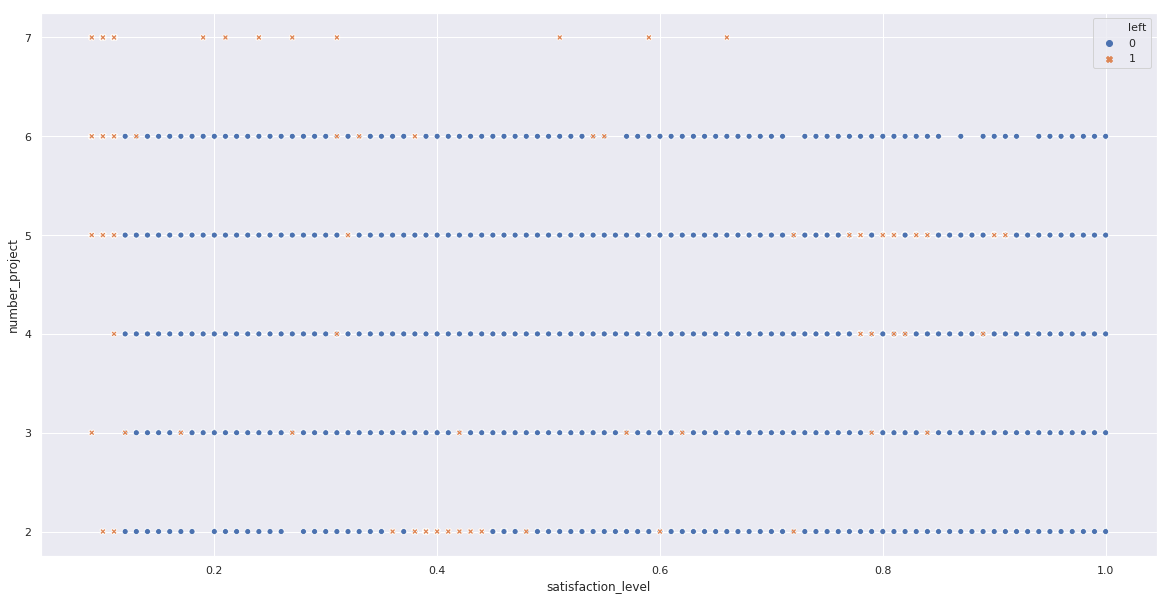

In [14]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
tips = pd.read_csv("train.csv")
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x=list_best_attributes[0], y=list_best_attributes[1],hue="left", style='left', data=tips)
plt.show()